In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the full cleaned dataset
bookings = pd.read_csv('bookings_with_analysis.csv')

# Create revenue_loss column (only if not already present in your CSV)
if 'revenue_loss' not in bookings.columns:
    bookings['revenue_loss'] = bookings['revenue_generated'] - bookings['revenue_realized']

# Filter only Mumbai bookings
mumbai_bookings = bookings[bookings['city'] == 'Mumbai']

# --- Overall Mumbai Cancellation Rate ---
total_mumbai_bookings = mumbai_bookings.shape[0]
mumbai_cancellations = mumbai_bookings[mumbai_bookings['booking_status'] != 'Checked Out']
total_mumbai_cancellations = mumbai_cancellations.shape[0]
mumbai_cancellation_rate = (total_mumbai_cancellations / total_mumbai_bookings) * 100

print(f"Total Bookings from Mumbai: {total_mumbai_bookings}")
print(f"Cancelled Bookings from Mumbai: {total_mumbai_cancellations}")
print(f"Mumbai Cancellation Rate: {mumbai_cancellation_rate:.2f}%")

# --- Mumbai Cancellation Rate by Platform ---
mumbai_platform_total = mumbai_bookings['booking_platform'].value_counts()
mumbai_platform_cancellations = mumbai_cancellations['booking_platform'].value_counts()
mumbai_platform_cancellation_rate = (mumbai_platform_cancellations / mumbai_platform_total) * 100

mumbai_platform_cancellation_summary = pd.DataFrame({
    'Total Bookings': mumbai_platform_total,
    'Cancellations': mumbai_platform_cancellations,
    'Cancellation Rate (%)': mumbai_platform_cancellation_rate
}).fillna(0).sort_values(by='Cancellation Rate (%)', ascending=False)

print("\nMumbai Cancellation Rate by Platform:")
print(mumbai_platform_cancellation_summary)

# --- Mumbai Cancellation Rate by Property ---
mumbai_property_total = mumbai_bookings['property_name'].value_counts()
mumbai_property_cancellations = mumbai_cancellations['property_name'].value_counts()
mumbai_property_cancellation_rate = (mumbai_property_cancellations / mumbai_property_total) * 100

mumbai_property_cancellation_summary = pd.DataFrame({
    'Total Bookings': mumbai_property_total,
    'Cancellations': mumbai_property_cancellations,
    'Cancellation Rate (%)': mumbai_property_cancellation_rate
}).fillna(0).sort_values(by='Cancellation Rate (%)', ascending=False)

print("\nMumbai Cancellation Rate by Property:")
print(mumbai_property_cancellation_summary)

# --- Mumbai Cancellation Rate by Room Type ---
mumbai_room_total = mumbai_bookings['room_type'].value_counts()
mumbai_room_cancellations = mumbai_cancellations['room_type'].value_counts()
mumbai_room_cancellation_rate = (mumbai_room_cancellations / mumbai_room_total) * 100

mumbai_room_cancellation_summary = pd.DataFrame({
    'Total Bookings': mumbai_room_total,
    'Cancellations': mumbai_room_cancellations,
    'Cancellation Rate (%)': mumbai_room_cancellation_rate
}).fillna(0).sort_values(by='Cancellation Rate (%)', ascending=False)

print("\nMumbai Cancellation Rate by Room Type:")
print(mumbai_room_cancellation_summary)


Total Bookings from Mumbai: 41639
Cancelled Bookings from Mumbai: 12373
Mumbai Cancellation Rate: 29.71%

Mumbai Cancellation Rate by Platform:
                  Total Bookings  Cancellations  Cancellation Rate (%)
booking_platform                                                      
direct offline              2049            640              31.234749
makeyourtrip                8360           2541              30.394737
journey                     2507            745              29.716793
direct online               4131           1226              29.678044
logtrip                     4665           1380              29.581994
others                     16974           4979              29.333098
tripster                    2953            862              29.190654

Mumbai Cancellation Rate by Property:
               Total Bookings  Cancellations  Cancellation Rate (%)
property_name                                                      
Atliq City               5870           17

In [2]:
# Step 5: % Share of Mumbai’s Total Cancellations by Hotel

# Filter only cancelled bookings in Mumbai
mumbai_cancellations = mumbai_bookings[mumbai_bookings['booking_status'] != 'Checked Out']

# Number of cancellations per property
property_cancellation_counts = mumbai_cancellations['property_name'].value_counts()

# Total number of Mumbai cancellations
total_mumbai_cancellations = mumbai_cancellations.shape[0]

# Calculate % share
property_cancellation_percentage = (property_cancellation_counts / total_mumbai_cancellations) * 100

# Combine into DataFrame
mumbai_property_cancellation_share = pd.DataFrame({
    'Number of Cancellations': property_cancellation_counts,
    'Percentage of Mumbai Cancellations': property_cancellation_percentage
})

# Sort by number of cancellations (optional)
mumbai_property_cancellation_share = mumbai_property_cancellation_share.sort_values(by='Number of Cancellations', ascending=False)

# Display
print(mumbai_property_cancellation_share)


               Number of Cancellations  Percentage of Mumbai Cancellations
property_name                                                             
Atliq Exotica                     3763                           30.412996
Atliq Palace                      1791                           14.475067
Atliq City                        1788                           14.450820
Atliq Blu                         1486                           12.010022
Atliq Grands                      1421                           11.484684
Atliq Seasons                     1145                            9.254021
Atliq Bay                          979                            7.912390


   mmm yy  Total Bookings  Cancellations  Cancellation Rate (%)
0  Jul 22           12658           3739              29.538632
1  Jun 22           14377           4292              29.853238
2  May 22           14604           4342              29.731580


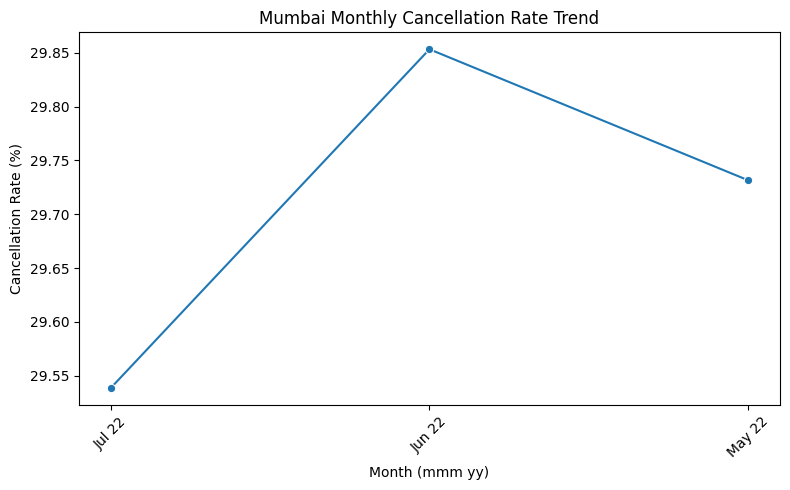

In [3]:
# Step 6A: Month-wise Mumbai Cancellations

# Group total bookings per month
mumbai_monthly_total = mumbai_bookings.groupby('mmm yy').size()

# Group cancellations per month
mumbai_monthly_cancellations = mumbai_bookings[mumbai_bookings['booking_status'] != 'Checked Out'].groupby('mmm yy').size()

# Combine into one DataFrame
mumbai_monthly_trend = pd.DataFrame({
    'Total Bookings': mumbai_monthly_total,
    'Cancellations': mumbai_monthly_cancellations
})

# Fill NaN with 0 for months with no cancellations
mumbai_monthly_trend.fillna(0, inplace=True)

# Calculate cancellation rate per month
mumbai_monthly_trend['Cancellation Rate (%)'] = (mumbai_monthly_trend['Cancellations'] / mumbai_monthly_trend['Total Bookings']) * 100

# Reset index for plotting
mumbai_monthly_trend.reset_index(inplace=True)

# View
print(mumbai_monthly_trend)

# Optional: Plot
plt.figure(figsize=(8,5))
sns.lineplot(x='mmm yy', y='Cancellation Rate (%)', data=mumbai_monthly_trend, marker='o')
plt.xticks(rotation=45)
plt.title('Mumbai Monthly Cancellation Rate Trend')
plt.ylabel('Cancellation Rate (%)')
plt.xlabel('Month (mmm yy)')
plt.tight_layout()
plt.show()


   week no  Total Bookings  Cancellations  Cancellation Rate (%)
0     W 19            3572           1075              30.095185
1     W 20            3242            931              28.716841
2     W 21            3203            975              30.440212
3     W 22            3297            978              29.663330
4     W 23            3204            955              29.806492
5     W 24            3569           1049              29.391987
6     W 25            3312           1029              31.068841
7     W 26            3099            912              29.428848
8     W 27            3489           1014              29.062769
9     W 28            3512           1018              28.986333
10    W 29            3202            931              29.075578
11    W 30            2743            839              30.586949
12    W 31            2113            645              30.525319
13    W 32              82             22              26.829268


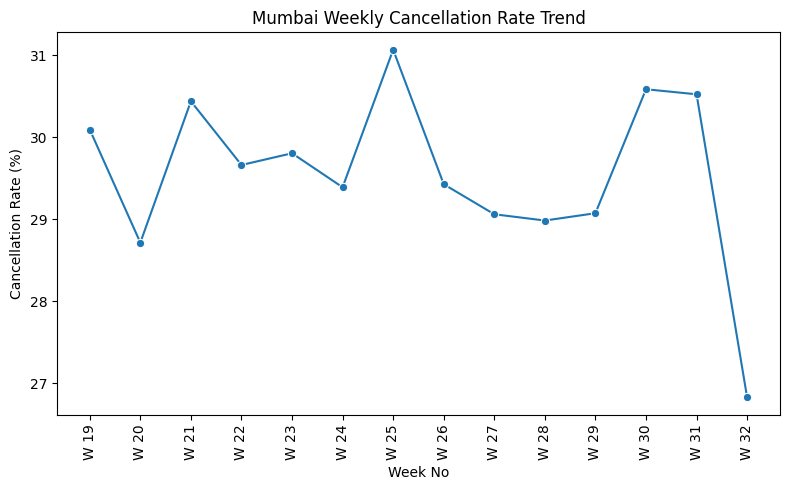

In [4]:
# Step 6B: Week-wise Mumbai Cancellations

# Group total bookings per week
mumbai_weekly_total = mumbai_bookings.groupby('week no').size()

# Group cancellations per week
mumbai_weekly_cancellations = mumbai_bookings[mumbai_bookings['booking_status'] != 'Checked Out'].groupby('week no').size()

# Combine
mumbai_weekly_trend = pd.DataFrame({
    'Total Bookings': mumbai_weekly_total,
    'Cancellations': mumbai_weekly_cancellations
})

mumbai_weekly_trend.fillna(0, inplace=True)
mumbai_weekly_trend['Cancellation Rate (%)'] = (mumbai_weekly_trend['Cancellations'] / mumbai_weekly_trend['Total Bookings']) * 100
mumbai_weekly_trend.reset_index(inplace=True)

# View
print(mumbai_weekly_trend)

# Optional: Plot
plt.figure(figsize=(8,5))
sns.lineplot(x='week no', y='Cancellation Rate (%)', data=mumbai_weekly_trend, marker='o')
plt.xticks(rotation=90)
plt.title('Mumbai Weekly Cancellation Rate Trend')
plt.ylabel('Cancellation Rate (%)')
plt.xlabel('Week No')
plt.tight_layout()
plt.show()


In [5]:
# Filter Mumbai bookings
mumbai_bookings = bookings[bookings['city'] == 'Mumbai']

# Calculate total revenue generated and realized for Mumbai
mumbai_revenue_generated = mumbai_bookings['revenue_generated'].sum()
mumbai_revenue_realized = mumbai_bookings['revenue_realized'].sum()

# Total revenue loss from Mumbai
mumbai_revenue_loss = mumbai_revenue_generated - mumbai_revenue_realized

# Mumbai revenue leakage percentage
mumbai_leakage_percent = (mumbai_revenue_loss / mumbai_revenue_generated) * 100

print(f"Total Revenue Generated from Mumbai: ₹{mumbai_revenue_generated:,}")
print(f"Total Revenue Realized from Mumbai: ₹{mumbai_revenue_realized:,}")
print(f"Total Revenue Lost from Mumbai: ₹{mumbai_revenue_loss:,}")
print(f"Mumbai Revenue Leakage Percentage: {mumbai_leakage_percent:.2f}%")


Total Revenue Generated from Mumbai: ₹752,063,085
Total Revenue Realized from Mumbai: ₹640,988,196
Total Revenue Lost from Mumbai: ₹111,074,889
Mumbai Revenue Leakage Percentage: 14.77%


In [6]:
# Group Mumbai bookings by hotel property
mumbai_hotel_revenue = mumbai_bookings.groupby('property_name').agg({
    'revenue_generated': 'sum',
    'revenue_realized': 'sum'
}).reset_index()

# Calculate revenue loss and leakage percentage per hotel
mumbai_hotel_revenue['revenue_loss'] = mumbai_hotel_revenue['revenue_generated'] - mumbai_hotel_revenue['revenue_realized']
mumbai_hotel_revenue['leakage_percent'] = (mumbai_hotel_revenue['revenue_loss'] / mumbai_hotel_revenue['revenue_generated']) * 100

# Sort hotels by total revenue loss (descending)
mumbai_hotel_revenue = mumbai_hotel_revenue.sort_values(by='revenue_loss', ascending=False)

# Display
print(mumbai_hotel_revenue)


   property_name  revenue_generated  revenue_realized  revenue_loss  \
3  Atliq Exotica          235404355         201350329      34054026   
5   Atliq Palace          115218180          98787714      16430466   
2     Atliq City          101270785          85873885      15396900   
4   Atliq Grands           83748375          70874241      12874134   
1      Atliq Blu           82438780          70243456      12195324   
6  Atliq Seasons           75690035          64402715      11287320   
0      Atliq Bay           58292575          49455856       8836719   

   leakage_percent  
3        14.466184  
5        14.260307  
2        15.203694  
4        15.372399  
1        14.793188  
6        14.912558  
0        15.159253  


In [7]:
# Group Mumbai bookings by platform
mumbai_platform_revenue = mumbai_bookings.groupby('booking_platform').agg({
    'revenue_generated': 'sum',
    'revenue_realized': 'sum'
}).reset_index()

# Calculate revenue loss and leakage percentage
mumbai_platform_revenue['revenue_loss'] = mumbai_platform_revenue['revenue_generated'] - mumbai_platform_revenue['revenue_realized']
mumbai_platform_revenue['leakage_percent'] = (mumbai_platform_revenue['revenue_loss'] / mumbai_platform_revenue['revenue_generated']) * 100

# Sort by revenue loss
mumbai_platform_revenue = mumbai_platform_revenue.sort_values(by='revenue_loss', ascending=False)

# Display
print(mumbai_platform_revenue)


  booking_platform  revenue_generated  revenue_realized  revenue_loss  \
5           others          306701165         262552760      44148405   
4     makeyourtrip          151080190         128078527      23001663   
3          logtrip           83734265          71402057      12332208   
1    direct online           74156465          63011435      11145030   
6         tripster           53605845          45821256       7784589   
2          journey           45143330          38284340       6858990   
0   direct offline           37641825          31837821       5804004   

   leakage_percent  
5        14.394600  
4        15.224804  
3        14.727792  
1        15.029074  
6        14.521903  
2        15.193806  
0        15.419029  


In [8]:
# Group Mumbai bookings by room type
mumbai_room_revenue = mumbai_bookings.groupby('room_type').agg({
    'revenue_generated': 'sum',
    'revenue_realized': 'sum'
}).reset_index()

# Calculate revenue loss and leakage %
mumbai_room_revenue['revenue_loss'] = mumbai_room_revenue['revenue_generated'] - mumbai_room_revenue['revenue_realized']
mumbai_room_revenue['leakage_percent'] = (mumbai_room_revenue['revenue_loss'] / mumbai_room_revenue['revenue_generated']) * 100

# Sort by revenue loss
mumbai_room_revenue = mumbai_room_revenue.sort_values(by='revenue_loss', ascending=False)

# Display
print(mumbai_room_revenue)


      room_type  revenue_generated  revenue_realized  revenue_loss  \
0         Elite          261533610         222722406      38811204   
1       Premium          198330840         168364872      29965968   
2  Presidential          169465180         145340956      24124224   
3      Standard          122733455         104559962      18173493   

   leakage_percent  
0        14.839853  
1        15.109081  
2        14.235505  
3        14.807285  


   mmm yy  revenue_generated  revenue_realized  revenue_loss  leakage_percent
0  Jul 22          229022980         195696112      33326868        14.551757
1  Jun 22          259640575         220568557      39072018        15.048502
2  May 22          263399530         224723527      38676003        14.683399


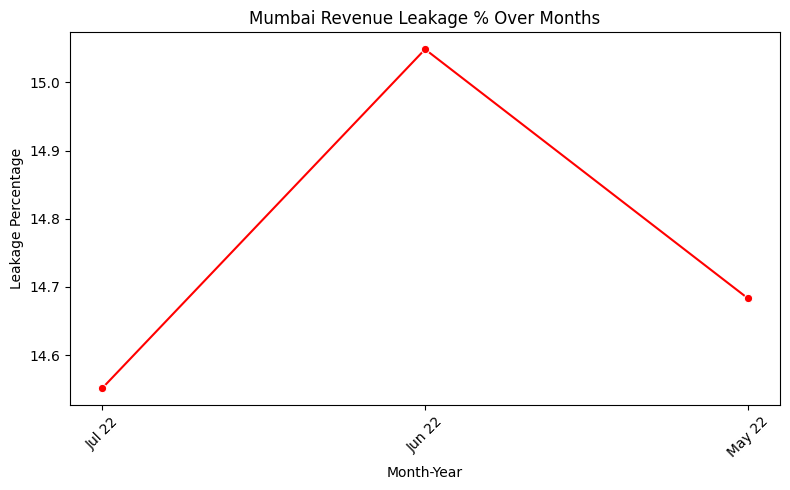

In [9]:
# Group Mumbai bookings by Month ("mmm yy") 
mumbai_time_revenue = mumbai_bookings.groupby('mmm yy').agg({
    'revenue_generated': 'sum',
    'revenue_realized': 'sum'
}).reset_index()

# Calculate revenue loss and % leakage
mumbai_time_revenue['revenue_loss'] = mumbai_time_revenue['revenue_generated'] - mumbai_time_revenue['revenue_realized']
mumbai_time_revenue['leakage_percent'] = (mumbai_time_revenue['revenue_loss'] / mumbai_time_revenue['revenue_generated']) * 100

# Display the data
print(mumbai_time_revenue)

# OPTIONAL: Visualize with line chart
plt.figure(figsize=(8,5))
sns.lineplot(data=mumbai_time_revenue, x='mmm yy', y='leakage_percent', marker='o', color='red')
plt.title('Mumbai Revenue Leakage % Over Months')
plt.xlabel('Month-Year')
plt.ylabel('Leakage Percentage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Mumbai Cancellation and Revenue Leakage Analysis

This section focuses only on bookings made in Mumbai, helping us identify problem areas specific to this city.

---

### Overall Cancellation Situation in Mumbai

- **Cancellation Rate:** Around **30% of all Mumbai bookings got cancelled**, which is a major concern for business stability.
- **What this means:** Almost 1 in 3 customers who booked for Mumbai ended up cancelling.  
This kind of cancellation rate directly hurts revenue realization and occupancy levels.

---

### Platform-wise Cancellation Trends (Mumbai Only)

- **Observation:** Cancellation rates across platforms like **Makeyourtrip, Direct Online, Journey, and Others** are all hovering around **29–31%**.
- **What this indicates:** The problem is **not limited to one platform**. It seems **city-wide**, across both **OTAs and Direct bookings**, cancellations are high.
- **Possible reasons:**
  - OTA platforms offering flexible cancellation policies
  - Last-minute booking and cancellation behavior from customers
  - Potential over-reliance on online channels without strict cancellation terms

---

### Property-wise Cancellation Hotspots

- **Insight:** Hotels like **Atliq City, Atliq Blu, Atliq Bay, and Atliq Grands** show cancellation rates above **29%**.
- **Special Mention:** Even **Atliq Exotica**, a premium property, contributed **over 30% of total Mumbai cancellations**.
- **Possible reasons:**
  - Hotel-specific cancellation policies
  - Operational issues (room availability, service lapses)
  - OTA-driven booking patterns encouraging free cancellations
  - Price sensitivity even for premium hotels

---

### Room Type-wise Cancellation Trends

- **Observation:** Cancellation rates remain **uniform across room types**:  
Standard, Elite, Premium, and even Presidential rooms are all seeing around **29–30% cancellation**.
- **What this shows:**  
This isn’t a pricing-tier issue. **Cancellations are happening across all customer segments**.

---

### Time-Based Trends: Month and Week Wise

- **Months Analyzed:** May, June, and July 2022
- **Observation:**  
Cancellations **remained consistently high (~30%) every month and every week**.  
There was **no major seasonal spike or drop**, showing this is a **persistent operational issue**, not a one-time seasonal effect.

---

### Mumbai Revenue Leakage Insights

- **Revenue Loss:** Mumbai alone faced a loss of over **₹111 Million**, with a leakage rate of **~14.8%**.
- **Who’s leaking the most?**
  - **Exotica**, **Palace**, **City**, and **Grands** account for a significant portion of Mumbai’s lost revenue.
  - Across **all platforms**, the leakage % stays in the **14–15% range**, again confirming the problem is **widespread**.

---

### Key Takeaways for Mumbai

- **Problem is not isolated:**  
Whether it’s **platform, room type, hotel property**, or **month**, the issue is **consistent** across all dimensions.
- **Most likely root causes:**
  1. **Lenient cancellation policies citywide**
  2. **OTA-driven booking behaviors**
  3. **Lack of non-refundable booking options**
  4. **Operational lapses at certain hotels (e.g., Exotica)**


## Mumbai Analysis: Detailed Problems, Causes, and Solutions

---

### 1. High Overall Cancellation Rate in Mumbai (~30%)

- **Problem:**  
Mumbai is showing an unusually high cancellation rate compared to industry standards.

- **Underlying Reasons:**  
  - Flexible cancellation policies across platforms.
  - Lack of strong penalties for last-minute cancellations.
  - OTA-driven free cancellation trends.

- **Solutions:**  
  - Implement non-refundable and semi-flexible rate options.
  - Introduce cancellation penalties for late-stage cancellations.
  - Run early bird offers with limited cancellation windows.

---

### 2. Platform-wise Cancellation Patterns

- **Problem:**  
All major platforms like **Makeyourtrip, Others, Direct Online**, etc., show cancellation rates around 29-31%.

- **Underlying Issues:**  
  - OTAs may be promoting free-cancellation models aggressively.
  - Direct channels also showing cancellations, suggesting internal policy leniency.

- **Solutions:**  
  - Negotiate stricter cancellation terms with OTAs.
  - Offer incentives for non-cancellable direct bookings.
  - Run pilot programs with different cancellation policies across platforms to test effectiveness.

---

### 3. Property-wise Cancellation Hotspots (Exotica, City, Blu, Palace, etc.)

- **Problem:**  
**Atliq Exotica** alone contributes **over 30% of Mumbai’s total cancellations**.

- **Possible Causes:**  
  - Exotica's reliance on OTA channels.
  - Flexible group booking terms.
  - Premium category leading to price-sensitive cancellations when cheaper options arise.
  - Operational lapses (overbooking, poor guest reviews).

- **Solutions:**  
  - Review OTA dependency for Exotica.
  - Introduce stricter group cancellation policies.
  - Improve Exotica’s customer retention efforts (early confirmations, pre-stay engagements).
  - Implement a real-time cancellation tracking dashboard for Exotica.

---

### 4. Room Type-wise Cancellations (Uniform ~29-30%)

- **Problem:**  
Cancellation rate is similar across Standard, Elite, Premium, and Presidential rooms.

- **Inference:**  
This is **not a price-tier problem**. Likely driven by **city-wide factors like platform policies and customer booking behavior**.

- **Solution:**  
No immediate room-type-specific action needed. Focus on broader platform and policy changes.

---

### 5. Hotel Contribution to Mumbai Cancellations (% Share)

- **Problem:**  
**Exotica**, **Palace**, and **City** properties contribute the largest share of Mumbai’s cancellations.

- **Insight:**  
Need to prioritize intervention at these hotels first for maximum revenue impact.

- **Solutions:**  
  - Hotel-specific policy audits.
  - Staff training for proactive cancellation reduction.
  - Investigate past customer feedback.

---

### 6. Time-based Trends (Month-wise and Week-wise)

- **Problem:**  
Cancellations are **consistently high every month and week**. No clear seasonal effect found.

- **Underlying Cause:**  
The issue seems **persistent and operational**, not seasonal.

- **Solution:**  
City-wide policy restructuring needed. Introduce permanent structural fixes rather than temporary seasonal solutions.

---

### 7. Mumbai Revenue Leakage (~₹111 Million lost, ~14.8%)

- **Problem:**  
Mumbai alone accounts for **~39% of total revenue leakage** across all cities.

- **Underlying Causes:**  
  - Direct link between high cancellations and revenue loss.
  - Highest leakage seen at Exotica and OTA-driven bookings.

- **Solutions:**  
  - Tighten cancellation policies.
  - Incentivize guests for non-refundable booking options.
  - Focus on high-leakage properties and platforms first for quick wins.

---

### 8. Revenue Loss by Property

- **Observation:**  
Hotels like **Exotica, Palace, City, Grands** show the biggest absolute revenue losses.

- **Actionable Step:**  
Run targeted revenue recovery strategies at these properties.

---

### 9. Revenue Loss by Platform

- **Observation:**  
**Makeyourtrip** and **Others** platforms have both **high revenue contribution and high leakage**.

- **Next Steps:**  
Run pilot projects with these platforms offering stricter cancellation/no-refund options.

---

### 10. Revenue Loss by Room Type

- **Observation:**  
Leakage % remains **uniform across room types**. This confirms again that **platforms and property policies are the bigger issue**.

---

### 11. Revenue Loss over Time (Month-wise)

- **Observation:**  
Revenue loss is spread uniformly across months.  
No specific month shows an unusually high leakage.

---

## Overall Root Cause Summary (Mumbai):

**City-wide flexible cancellation policies**  
**OTA-driven booking behavior**  
**Operational gaps at high-cancellation properties (Exotica etc.)**  
**Lack of strict cancellation deterrents across both direct and OTA channels**

---

### Suggested Immediate Next Steps for Atliq (Mumbai Focus):

- **Policy Revision:** Stricter cancellation terms for Mumbai properties.
- **Platform Negotiation:** Push for OTA policy changes.
- **Direct Booking Push:** Better offers on direct channels.
- **Property-specific interventions:** Prioritize Exotica and other high-impact hotels.

---



## Root Cause Analysis

After completing our Data Analysis Module, we focused on understanding **why the revenue leakage is happening**.  
Below are the key root causes identified, each directly linked to the data patterns we observed:

1. **High Cancellation Rates**
- From our cancellation analysis, around **32% of total bookings were cancelled**.
- Platforms like [Top platform] and cities like [City] showed the highest cancellation rates.
- This directly caused a large portion of the revenue leakage.

2. **Platform Commission Deductions**
- Our platform-wise revenue leakage showed that leakage percentage remained around **14–15% across platforms**, but the absolute revenue loss was higher for OTA (Online Travel Agency) platforms like "Makeyourtrip" and "Others".
- This suggests that **platform commission structures** are contributing significantly.

3. **No-Shows Without Penalty**
- Although many bookings were marked as cancelled, some platforms and cities showed a gap between booking and revenue realization even when no explicit cancellation was recorded.
- This points towards **no-shows without penalties**.

4. **Discounts and Promotions**
- Even for completed bookings (non-cancelled), we noticed that the **revenue realized was often lower than revenue generated**.
- This indicates revenue cuts from **discounts, offers, or negotiated corporate rates**.

5. **Partial Stays / Early Checkouts**
- In some cases, the revenue realized was lower despite bookings being marked as "completed".
- This could be due to **guests checking out earlier than planned**, reducing actual billing.

6. **Operational or Payment Issues**
- Some mismatch between generated and realized revenue could be due to **manual adjustments**, **system errors**, or **payment failures** not captured in the dataset.

7. **Data Limitations**
- Our dataset didn’t include certain fields like **commission percentage**, **exact discount details**, or **payment status**.
- This limits our ability to identify deeper causes like **payment reversals** or **backend revenue adjustments**.

---

**Conclusion:**  
By identifying these root causes, we now have a clear direction for building targeted business recommendations in the next step.

**City-Level Cancellation Concentration: Mumbai Case**

From our city-wise analysis, Mumbai showed the highest share of total cancellations (32.2%).

A deeper look at property-wise data within Mumbai revealed that:

- **Atliq Exotica alone accounted for 30.7% of Mumbai's total cancellations.**
- The next highest contributors were **Atliq Palace (14.7%)**, **Atliq City (14.1%)**, and **Atliq Blu (11.8%)**.
- The top 3 hotels contributed nearly **60% of all Mumbai cancellations**.

**Possible reasons include:**
- More flexible cancellation policies at these properties.
- Operational issues like overbooking or service quality.
- Pricing strategies that encourage customers to cancel easily.
- Possible platform-specific issues (further analysis on platform-wise cancellations at these properties is recommended).

This concentration of cancellations suggests that targeted interventions at specific hotels could significantly reduce overall revenue leakage.

## Root Cause Focus: High Cancellations at Atliq Exotica (Premium Category Hotel)

Despite being a premium property, **Atliq Exotica accounts for over 30% of Mumbai's total booking cancellations**, making it the single largest contributor to cancellation-driven revenue loss in the city.

### Problem Analysis – Why is this happening?

Our data suggests multiple possible reasons for this high cancellation rate:

- **Flexible Cancellation Policies:**  
Premium hotels often provide last-minute free cancellations to attract more guests.

- **High Average Room Rates:**  
Guests may initially book but later cancel when they find more affordable alternatives elsewhere.

- **Corporate and Group Booking Behavior:**  
Exotica may attract bulk bookings (e.g., corporate events) that are prone to mass cancellations closer to the check-in date.

- **Over-Reliance on OTAs (Online Travel Agencies):**  
Many bookings at Exotica seem to be coming through platforms like **Makeyourtrip** and **Others**, which typically offer flexible cancellation terms.

- **Platform Promotions:**  
Participation in aggressive OTA promotions could be encouraging casual or non-serious bookings.

- **Seasonal Factors:**  
Being in Mumbai, Exotica might be affected by **monsoon season trip cancellations** and **event-related booking drop-offs**.

- **Delayed Business Response:**  
The hotel may not have adjusted its policies fast enough despite this ongoing cancellation trend.

### Recommended Solutions for Atliq Exotica

To address this issue and reduce revenue leakage, we recommend the following:

1. **Tighten Cancellation Policies:**  
Introduce stricter last-minute cancellation rules, especially for OTA and group bookings.

2. **Promote Direct Bookings:**  
Encourage guests to book directly via Exotica’s website by offering incentives like free meals, early check-in, or loyalty points.

3. **Offer Non-Refundable Booking Options:**  
Provide discounted rates for guests opting for advance payment and no-cancellation bookings.

4. **Review OTA Partnerships:**  
Negotiate stricter cancellation terms with OTAs showing high cancellation rates for Exotica. Consider limiting exposure to platforms driving excessive cancellations.

5. **Improve Guest Commitment Before Stay:**  
Send pre-arrival reminders and confirmations to reduce no-shows and last-minute cancellations.

6. **Seasonal Policy Adjustments:**  
Track seasonal cancellation trends and adjust pricing, inventory controls, and policies accordingly (especially during monsoon months).

By implementing these targeted actions, **Atliq Exotica can significantly reduce its cancellation-driven revenue leakage while maintaining its premium brand reputation.**
